# Práctica 1: Redes Neuronales para la clasificación de imágenes

En esta primera práctica, vamos a dar un repaso a la historia de las redes neuronales a traves de la clasificación de imagenes.

En este caso, haremos uso de la plataforma [Kaggle](https://www.kaggle.com/) para utilizar uno de los muchos datasets que ponen a disposición de la comunidad. Concretamente, vamos a utilizar un dataset muy curioso que recoge expresiones faciales de distintos animales, disponible [aquí](https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset) con el cual enfrentaremos el problema de clasificación.

Empezaremos por **preparar los datos** para poder ser procesados por una red convolucional. Despues, el objetivo sera **implementar una red neuronal clasica** para resolver el problema de clasificación. Finalmente, la practica se centra en la **implementacion de la primera red convolucional** (CNN) que batió todos los records en clasificacion: [**AlexNet**](https://papers.nips.cc/paper_files/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html). Este modelo sigue siendo la base de las arquitecturas contemporaneas basadas en redes convolucionales.

La practica tiene **cuatro ejercicios**:

*   Ej. 1: Adquisición de datos (2.5 puntos)
*   Ej. 2: Entrenamiento red neuronal clasica (2,5 puntos)
*   Ej. 3: Arquitectura del estado del arte: AlexNet (4 puntos)
*   Ej. 4: Análisis de los entrenamientos (1 punto)






### Objetivos

Los objetivos esta primera práctica son los siguientes:
- Adquisición y disponibilización de datos utilizando las estructuras de datos proporcionadas por PyTorch.
- Diseño de una **red neuronal** **convencional** o **clasica** adaptada a los datos de entrada, así como su posterior desarrollo y entrenamiento utilizando **PyTorch**.
- Implementar una **Red Neuronal Convolucional** (CNN) del estado del arte: **AlexNet**
- Desarrollar un pensamiento critico para evaluar el rendimiento de los modelos


### Consideraciones importantes en el uso de este Notebook


- Asegúrate de utilizar las celdas de tipo "Markdown" para texto y las de "Code" para código. Combinar distintos tipos de celda ayuda a la explicabilidad de la resolución y a la limpieza en general. Puedes crear celdas adicionales si lo necesitas.
- Asegurate de **no cambiar** **el** **nombre de las variables** de codigo que estan como enunciado.
- Aunque se puede correr con CPU, es recomendable utilizar las GPU/TPUs disponibles en colab para el Ejercicio 3., para entrenar la CNN mas rapido.
- A la hora de la entrega del Notebook definitivo, asegúrate que lo entregas ejecutado y **con las salidas de las celdas guardadas**. Esto será necesario para la generación del **PDF de entrega**.
- El código cuanto más comentado mejor. Además, cualquier reflexión adicional siempre será bienvenida.

### Librerias a importar
Corre la celda de codigo de abajo para importar las librerias necesarias en la practica

In [1]:
import torch, torchvision
import os
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


Verifica el tipo de hardware que estas utilizando:

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


Esta practica la he hecho en mi laptop con AMD Ryzen 7 + 64GB RAM + NVidia RTX 3060 GPU.
+ Windows 11 
+ VSCode con las extensiones 
    + Python y con el kernel .venv(Python 3.10)  +  "Activar venv: ..venv\Scripts\Activate.ps1"
    + Jupyter
+ Librerías torch, torchvivion, torchaudio, matplotlib, numpy, ipkernel y kagglehub

## Ej 1. Adquisición de datos (2.5 puntos)

Antes de implementar redes neuronales o de entrenarlas, es necesario llevar a cabo la adquisición y la preparación de los datos.

El primer ejercicio consiste en la **descarga del dataset**, disponible [aquí](https://www.kaggle.com/datasets/anshtanwar/pets-facial-expression-dataset), y la construcción de los tres **Datasets** con los siguientes nombres:
- *train_dataset*: Incluirá las imágenes contenidas en la carpeta de **train** del dataset original.
- *validation_dataset*: Incluirá las imágenes contenidas en la carpeta de **validación** del dataset original.
- *test_dataset*: Incluirá las imágenes contenidas en la carpeta de **test** del dataset original.

Para **descargar los datos**, hay **dos opciones**:
1. Descargar los datos desde Kaggle y luego subirlos a tu Drive para poder acceder a ellos desde Colab. Si trabajas en local, simplemente descargarlos desde Kaggle y trabajar en un Jupyter Notebook.
2. Correr la celda de abajo para descargar los datos en cache. Esta opcion es menos tediosa, pero ten en cuenta que deberas correr esta celda y descargar los datos cada vez que tu sesion en Colab expire.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anshtanwar/pets-facial-expression-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Carlos\.cache\kagglehub\datasets\anshtanwar\pets-facial-expression-dataset\versions\11


### Ej 1.1: Creación de Datasets (1 punto)
Crea los objetos **Dataset** correspondientes a los 3 conjuntos. Como puedes ver, el árbol de directorios del dataset original es algo especial. Puede parecer complejo pero realmente es el estándar cuando se trabaja con imágenes. Debemos utilizar como directorio base el llamado "Master Folder".

**💡Pista**: para construir los **Dataset** hay muchas opciones, pero os propongo dos:
- Crear una clase **Dataset** personalizada que permita la lectura de los datos. Deberás desarrollar los métodos `__init__`, `__len__` y `__getitem__`.
- Usar la clase de Torchvision **datasets.ImageFolder**. Puedes consultar su documentación [aquí](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html).

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets, transforms

A continuacion, utilizamos `transforms` para aplicar transformaciones a nuestros datos. Esta es una practica generalizada en el uso de redes neuronales, y en particular trabajando con imagenes. Es un preprocesamiento estandarizado. Su funcion principal es que todas las imágenes tengan el mismo tamaño, formato y escala estadística.

In [5]:
transformation = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.5125,0.4667,0.4110], # Medias y medianas extraídas del dataset ImageNet
                         std= [0.2621,0.2501,0.2453])
])

para evitar problemas voy a correr este codigo para verificar la estructura del dataset.

Verificar estructura del DataSet:

In [6]:
import os

# Verificar qué carpetas existen realmente
print("📁 Estructura del dataset:")
print(f"Ruta base: {path}")

# Listar contenido de la ruta principal
for item in os.listdir(path):
    item_path = os.path.join(path, item)
    if os.path.isdir(item_path):
        print(f"📂 {item}/")
        # Listar subcarpetas
        for subitem in os.listdir(item_path):
            subitem_path = os.path.join(item_path, subitem)
            if os.path.isdir(subitem_path):
                print(f"   📂 {subitem}/")

📁 Estructura del dataset:
Ruta base: C:\Users\Carlos\.cache\kagglehub\datasets\anshtanwar\pets-facial-expression-dataset\versions\11
📂 Angry/
📂 happy/
📂 Master Folder/
   📂 test/
   📂 train/
   📂 valid/
📂 Other/
📂 Sad/


Construye los **datasets** para cada conjunto de datos: train, validation y test. La funcion `transformation` **debe de ser aplicada a todos los conjuntos**.

In [7]:
data_path = path + "/Master Folder" # Completar
train_dataset = datasets.ImageFolder(data_path + "/train", transform=transformation) # Completar
validation_dataset = datasets.ImageFolder(data_path + "/valid", transform=transformation) # Completar
test_dataset = datasets.ImageFolder(data_path + "/test", transform=transformation) # Completar

### Ej 1.2: Análisis de datos (0,5 puntos)
El análisis exploratorio de datos o *exploratory data analysis* (EDA) es la etapa que consume más tiempo y que tiene mayor complejidad e impacto en cualquier proyecto de datos. Pese a esto, el objetivo de este módulo es el desarrollo de redes neuronales y, por tanto, no dedicaremos casi tiempo al EDA.

Aún así, sí que es importante que demos respuesta a preguntas básicas que nos van a permitir el correcto diseño y desarrollo de las redes.

Responde a las siguientes preguntas con el código necesario para poder obtener las respuestas de los **Datasets** previamente creados:

¿Cuántas clases tenemos en el problema?

In [8]:
num_classes = len(train_dataset.classes)
print(f"Número de clases: {num_classes}")
print(f"clases: {train_dataset.classes}")

Número de clases: 4
clases: ['Angry', 'Other', 'Sad', 'happy']


¿Qué forma tiene una label? ¿De qué tipo es?

In [9]:
sample_image, sample_label = train_dataset[0] # Accede al primer elemento del dataset (imagen + etiqueta) y desempaqueta la tupla en imagen y etiqueta.
print(f"Tipo de label: {type(sample_label)}") # verifico el tipo de dato con la función type()
print(f"valor de label: {sample_label}") # muestra el valor numérico de la etiqueta

Tipo de label: <class 'int'>
valor de label: 0


¿Cuántos registros tenemos en cada conjunto?

In [10]:
print(f"Train: {len(train_dataset)} imágenes")
print(f"Validation: {len(validation_dataset)} imágenes")
print(f"Test: {len(test_dataset)} imágenes")
print(f"Total: {len(train_dataset) + len(validation_dataset) + len(test_dataset)} imágenes")

Train: 1000 imágenes
Validation: 36 imágenes
Test: 38 imágenes
Total: 1074 imágenes


¿Están los conjuntos balanceados?

In [11]:

from collections import Counter

# Extraer todas las etiquetas del conjunto de entrenamiento
train_labels = [train_dataset[i][1] for i in range(len(train_dataset))]
train_distribution = Counter(train_labels)
print("Distribución de train:", dict(train_distribution))

# Análisis de balance
print("\nAnálisis de balance:")
total_samples = len(train_dataset)
for class_idx, count in train_distribution.items():
    class_name = train_dataset.classes[class_idx]
    percentage = (count / total_samples) * 100
    print(f"Clase '{class_name}': {count} imágenes ({percentage:.1f}%)")


Distribución de train: {0: 250, 1: 250, 2: 250, 3: 250}

Análisis de balance:
Clase 'Angry': 250 imágenes (25.0%)
Clase 'Other': 250 imágenes (25.0%)
Clase 'Sad': 250 imágenes (25.0%)
Clase 'happy': 250 imágenes (25.0%)


En este caso el dataset está está en un estado óptimo de balanceo, muy bien balanceado. Se considera que un dataset está suficientemente balanceado cuando sus clases están más o menos igualadas. 4 clases con una diferencia de < 10% se considera bueno. diferencia de < 20% se considera aceptable. Con una diferencia mayor el dataset requeriría técnicas de balanceo. Entonces, digamos que una tolerancia de +-10% sería aceptable. Pero en este caso que nos ocupa, tenemos un balanceo óptimo.

¿Qué forma tienen los datos de entrada? ¿De qué tipo son?

In [12]:
# Respuesta aquí

sample_image, _ = train_dataset[0] # obtiene la primera muestra (imagegn + etiqueta) e ignora la etiqueta con "_"
print(f"Forma de imagen: {sample_image.shape}") # Muestra la dimensión del tensor (canales, alto, ancho)
print(f"Tipo de datos: {sample_image.dtype}") # tipo de dato del tensor
print(f"Rango de valores: [{sample_image.min():.3f}, {sample_image.max():.3f}]") # Valores mínimo y máximo después de las transformaciones

print("\nInterpretación:")
print(f"- Canales: {sample_image.shape[0]} (RGB)")
print(f"- Alto: {sample_image.shape[1]} píxeles")
print(f"- Ancho: {sample_image.shape[2]} píxeles")
print(f"- Total píxeles por imagen (Alto x Ancho): {sample_image.shape[1] * sample_image.shape[2]}")

Forma de imagen: torch.Size([3, 224, 224])
Tipo de datos: torch.float32
Rango de valores: [-1.686, 1.570]

Interpretación:
- Canales: 3 (RGB)
- Alto: 224 píxeles
- Ancho: 224 píxeles
- Total píxeles por imagen (Alto x Ancho): 50176


### Ej 1.3: Creación de DataLoaders (1 punto)
Crea los tres **DataLoader** correspondientes a los tres **Datasets** previamente creados:
- *train_dataloder*: Para los datos de *train_dataset*.
- *validation_dataloder*: Para los datos de *validation_dataset*.
- *validation_dataloder*: Para los datos de *validation_dataset*.

Utiliza **batches de tamaño 64** y recuerda **mezclar** los datos en la creación.

In [13]:
from torch.utils.data import DataLoader

In [14]:
# creación de los batches con un tamaño de 64 y shuffle=True mezcla las muestras aleatoriamente y que en cada época el orden sea random.

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True) # Completar
validation_dataloader = DataLoader(validation_dataset, batch_size=64, shuffle=True) # Completar
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True) # Completar

##### ¿Cuántos batches se han creado en cada DataLoader?

In [15]:
print("\nLos DataLoaders creados con batches de 64 son los siguientes:")
print(f"\n  - Train DataLoader tiene:      >> {len(train_dataloader)} <<  batches")
print(f"  - Validation DataLoader tiene: >>  {len(validation_dataloader)} <<  batches")
print(f"  - Test DataLoader:             >>  {len(test_dataloader)} <<  batches")


Los DataLoaders creados con batches de 64 son los siguientes:

  - Train DataLoader tiene:      >> 16 <<  batches
  - Validation DataLoader tiene: >>  1 <<  batches
  - Test DataLoader:             >>  1 <<  batches


Copmentario:

Los 16 batches del Train ayudan a hacer un entrenamiento robusto con variabilidad. Validation y Test solo tienen 1 bath cada uno y puede parecer pequeño, pero es preferible asegurar un entrenamiento correcto.

## Ej 2. Entrenamiento red neuronal clasica (2,5 puntos)
El problema que estamos enfrentando hace uso de imágenes como datos de entrada. Como ya veremos más adelante tanto en la teoría como en esta actividad, existen arquitecturas de red optimizadas para los datos de este tipo. Aún así, y para comparar ambas aproximaciones, el segundo ejercicio consiste en diseñar y desarrollar una red clasica que trabaje con imágenes y que cumpla los siguientes requisitos:
- 2 capas ocultas. La primera con 512 y la segunda con 256 neuronas.
- Como función de activación se hará uso siempre de ReLUs.
- El optimizador será *ADAM*  con *learning_rate* = 1e-5.
- Ajustar la capa de salida al problema que estamos enfrentando.

El objetivo ahora es definir la red neuronal en PyTorch. Implementa el codigo con la arquitectura solicitada en la clase `NNModel`.

In [16]:
from torch import nn

class NNModel(nn.Module):
    '''Esta clase define la estructura de la red neuronal:'''
    def __init__(self):
        '''El constructor __init__(self) define qué componentes tiene la red.'''
        
        super(NNModel, self).__init__()
        '''Inicializa la clase padre (nn.Module) que toma del import de la librería "torch" en la primera línea'''
        
        self.flatten = nn.Flatten() 
        '''Este paso convierte la imagen de 3D a un vector 1D'''
        
        self.fc1 = nn.Linear(224 * 224 * 3, 512)
        '''Crea la primera capa oculta de 512 neuronas. Con "self.fc1", "fc1" se usa por convención 
        y significa "fully connected". Cada neurona recibe todos los píxeles de la capa de entrada 
        pero cada una analiza un patrón específico y diferente de las otras.''' 
        
        self.relu1 = nn.ReLU()
        '''Los datos pasan luego a la "Función de activación 'no-lineal' ReLU" la cual decide 
        si una neurona se "activa" o no'''
        
        self.fc2 = nn.Linear(512,256)
        '''Segunda capa oculta, "fc2" crea una segunda capa oculta "fully connected". Esta recibe
        los datos de las 512 neuronas de la primera capa oculta.  '''
        self.relu2 = nn.ReLU()
        '''El mismo paso que el anterior'''
        
        self.fc3 = nn.Linear(256, num_classes)
        '''Crea una capa de 4 neuronas con "num_classes", y es también la capa de salida: Toma los datos 
        de la segunda capa oculta de 256 neuronas. No es necesario usar ReLU.  '''
        
        

    def forward(self, x):
        '''Este método define cómo tiene que ser el flujo de información a través de la red'''
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        
        return x
    

Instancia la red en la variable `nn_model`:

In [17]:
nn_model = NNModel()
nn_model = nn_model.to(device)
print(f"- Modelo creado y movido a {device}")
print(f"- Tipo de modelo: {type(nn_model)}")

'''Este paso crea una isntancia de la clase NNModel creada en el paso anterior. Ejecuta el metodo __init__() y crea todas las capas.
Después mueve el modelo a pa GPU'''

- Modelo creado y movido a cuda
- Tipo de modelo: <class '__main__.NNModel'>


'Este paso crea una isntancia de la clase NNModel creada en el paso anterior. Ejecuta el metodo __init__() y crea todas las capas.\nDespués mueve el modelo a pa GPU'

¿Cuántos parámetros entrenables tiene el modelo? Implementa el codigo que de respuesta a esta pregunta.

In [18]:
def contar_parametros(modelo):
    """     Cuenta y muestra los parámetros entrenables del modelo      """
    parametros_totales = 0
    parametros_entrenables = 0
    
    print("Desglose de parámetros por capa:")
    print("-" * 40)
    
    for nombre, parametro in modelo.named_parameters():
        cantidad = parametro.numel()
        parametros_totales += cantidad
        
        if parametro.requires_grad:
            parametros_entrenables += cantidad
            print(f"{nombre:12s}: {cantidad:>10,} parámetros")
    
    print("-" * 40)
    print(f"total       : {parametros_totales:>10,} parámetros")
    print(f"\n>>> RESPUESTA = El modelo tiene --> {parametros_entrenables:>10,} <-- Parámetros entrenables")
    
    return parametros_entrenables


parametros_entrenables = contar_parametros(nn_model)


Desglose de parámetros por capa:
----------------------------------------
fc1.weight  : 77,070,336 parámetros
fc1.bias    :        512 parámetros
fc2.weight  :    131,072 parámetros
fc2.bias    :        256 parámetros
fc3.weight  :      1,024 parámetros
fc3.bias    :          4 parámetros
----------------------------------------
total       : 77,203,204 parámetros

>>> RESPUESTA = El modelo tiene --> 77,203,204 <-- Parámetros entrenables


Define el **optimizador** solicitado en la variable `nn_optimizer`:

In [19]:
'''En este paso se crea un objeto ADAM con el optimizador especificado en el enunciado es ADAM,
que sabe qué datos entrenar, los parámetros (77,203,204), y sasbe qué tan rápido hacerlo con
el learning rate especificado 1e-5'''

nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-5) 
print(f"Optimizador configurado: ADAM") 
print(f"Learning rate: {1e-5}")
print(f"Optimizando {parametros_entrenables:>10,} parámetros")

Optimizador configurado: ADAM
Learning rate: 1e-05
Optimizando 77,203,204 parámetros


¿Qué **función de coste** será óptima en el problema que estamos enfrentando?
Instancia la función de coste elegida en una variable de nombre `nn_loss_fn`:

In [20]:
nn_loss_fn = nn.CrossEntropyLoss()
print(f"Función de pérdida configurada: CrossEntropyLoss")
print(f"Tipo: {type(nn_loss_fn)}")
'''CrossEntroyLoss es la función de coste más adecuada para una clasificación multiclase con
una sola etiqueta correcta. Hay 4 clases que se excluyen mutuamente "Angry, Other, Sad, Happy". '''

Función de pérdida configurada: CrossEntropyLoss
Tipo: <class 'torch.nn.modules.loss.CrossEntropyLoss'>


'CrossEntroyLoss es la función de coste más adecuada para una clasificación multiclase con\nuna sola etiqueta correcta. Hay 4 clases que se excluyen mutuamente "Angry, Other, Sad, Happy". '

Ahora toca implementar la logica detras del **entrenamiento**. Desarrolla el método para entrenar el módelo una época, mostrando y devolviendo tanto `loss` medio de todos los batches de entrenamiento como el `accuracy`. La funcion esta pensada para que se pueda entrenar cualquier modelo.

**IMPORTANTE**: Respeta las entradas y las salidas previstas para el método `training`.

In [21]:
def training(dataloader, model, loss_fn, optimizer):

    model.train() # Indicamos al modelo que vamos a entrenar
    
    # variables para acumular métricas
    perdida_total = 0.0
    predicciones_correctas = 0
    muestras_totales = 0
    
    # Iterar por todos los batches del dataloader
    for indice_batch, (imagenes, etiquetas) in enumerate(dataloader):
        # Mover datos a GPU/CPU según corresponda
        imagenes, etiquetas = imagenes.to(device), etiquetas.to(device)
        
        # Forward pass: obtener predicciones
        predicciones = model(imagenes)
        
        # Calcular pérdida
        loss = loss_fn(predicciones, etiquetas)
        
        # Backward pass: calcular gradientes
        optimizer.zero_grad()  # Limpiar gradientes previos
        loss.backward()        # Calcular gradientes
        optimizer.step()       # Actualizar pesos
        
        # Calcular métricas
        perdida_total += loss.item()
        _, clases_predichas = torch.max(predicciones, 1)
        predicciones_correctas += (clases_predichas == etiquetas).sum().item()
        muestras_totales += etiquetas.size(0)
    
    # Calcular métricas promedio
    avg_train_loss = perdida_total / len(dataloader)
    accuracy = 100.0 * predicciones_correctas / muestras_totales
    
    print(f"Train Metrics: \n Accuracy: {accuracy:>0.1f}%, Avg train loss: {avg_train_loss:>8f}\n")
    return avg_train_loss, accuracy

A continuacion, crearemos la funcion para computar las metricas en los conjuntos de validation y test.
Aunque no siempre es así, asumiremos que el método para validación y test será el mismo. La única diferencia será el uso del **DataLoader** específico para cada etapa (e.g., para evaluar el conjunto de test, se pasaria como dataloader el dataloader del `test_dataset`). El método deberá **mostrar y devolver** tanto el `loss` promedio de los batches como el `accuracy` total del modelo.

In [22]:
def test_and_validation(dataloader, model, loss_fn):

    model.eval() # Indicamos que no vamos a entrenar

    perdida_total = 0.0
    predicciones_correctas = 0
    muestras_totales = 0
    
    # Sin cálculo de gradientes porque solo evaluamos
    with torch.no_grad():
        
        for imagenes, etiquetas in dataloader: # Iterar por todos los batches del dataloader
           
            imagenes, etiquetas = imagenes.to(device), etiquetas.to(device)  # Mover datos a GPU/CPU según corresponda
            predicciones = model(imagenes) # Forward pass SOLAMENTE (sin backward)
            loss = loss_fn(predicciones, etiquetas) # Calcular pérdida (solo para métricas)
            
            # Acumular métricas
            perdida_total += loss.item()
            _, clases_predichas = torch.max(predicciones, 1)
            predicciones_correctas += (clases_predichas == etiquetas).sum().item()
            muestras_totales += etiquetas.size(0)
    
    # Calcular métricas promedio
    avg_loss = perdida_total / len(dataloader)
    accuracy = 100.0 * predicciones_correctas / muestras_totales
    
    print(f"Val or Test Metrics: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {avg_loss:>8f} \n")
    return avg_loss, accuracy

Llegó la hora del **entrenamiento**. Entrena el `NNModel` durante **15 épocas** mostrando y almacenando los resultados en los arrays `nn_model_train_losses`, `nn_model_train_accs`,  `nn_model_val_losses` y `nn_model_val_accs` los resultados de train y validación en cada una de ellas.

Recuerda que el conjunto de **validación** se evalúa al final de cada época para medir el rendimiento del modelo en datos no vistos, sin influir en el ajuste de los pesos.

In [23]:
nn_model_train_losses, nn_model_train_accs, nn_model_val_losses, nn_model_val_accs = [],[],[],[]
epochs =  15 # Completar

print("🚀 INICIANDO ENTRENAMIENTO DE RED NEURONAL CLÁSICA")
print(f"Configuración: {epochs} épocas, batch_size=64, lr=1e-5")
print("=" * 60)

for t in range(epochs):
    print(f"Epoch {t+1}/{epochs}\n-------------------------------")

    # ENTRENAMIENTO: usar conjunto de train
    train_loss, train_acc = training(train_dataloader, nn_model, nn_loss_fn, nn_optimizer)
    
    # Guardar métricas de entrenamiento
    nn_model_train_losses.append(train_loss)
    nn_model_train_accs.append(train_acc)
    
    # VALIDACIÓN: evaluar en conjunto de validación
    val_loss, val_acc = test_and_validation(validation_dataloader, nn_model, nn_loss_fn)
    
    # Guardar métricas de validación
    nn_model_val_losses.append(val_loss)
    nn_model_val_accs.append(val_acc)
    
    # Resumen de la época
    print(f"RESUMEN ÉPOCA {t+1}:")
    print(f"   Train - Loss: {train_loss:.4f}, Accuracy: {train_acc:.1f}%")
    print(f"   Val   - Loss: {val_loss:.4f}, Accuracy: {val_acc:.1f}%")
    print("=" * 60)

print("ENTRENAMIENTO COMPLETADO")

🚀 INICIANDO ENTRENAMIENTO DE RED NEURONAL CLÁSICA
Configuración: 15 épocas, batch_size=64, lr=1e-5
Epoch 1/15
-------------------------------
Train Metrics: 
 Accuracy: 33.4%, Avg train loss: 1.367481

Val or Test Metrics: 
 Accuracy: 36.1%, Avg loss: 1.423822 

RESUMEN ÉPOCA 1:
   Train - Loss: 1.3675, Accuracy: 33.4%
   Val   - Loss: 1.4238, Accuracy: 36.1%
Epoch 2/15
-------------------------------
Train Metrics: 
 Accuracy: 52.7%, Avg train loss: 1.128317

Val or Test Metrics: 
 Accuracy: 33.3%, Avg loss: 1.367598 

RESUMEN ÉPOCA 2:
   Train - Loss: 1.1283, Accuracy: 52.7%
   Val   - Loss: 1.3676, Accuracy: 33.3%
Epoch 3/15
-------------------------------
Train Metrics: 
 Accuracy: 68.1%, Avg train loss: 0.941832

Val or Test Metrics: 
 Accuracy: 33.3%, Avg loss: 1.434863 

RESUMEN ÉPOCA 3:
   Train - Loss: 0.9418, Accuracy: 68.1%
   Val   - Loss: 1.4349, Accuracy: 33.3%
Epoch 4/15
-------------------------------
Train Metrics: 
 Accuracy: 77.3%, Avg train loss: 0.802401

Val or Te

¿Cuáles son las métricas del modelo en el **conjunto de test**? Implementa el codigo para obtener las metricas sobre el conjunto de test.

In [24]:
print("  EVALUACIÓN FINAL EN CONJUNTO DE TEST")
print("=" * 40)

# Evaluar modelo en test usando la función que ya definimos
test_loss, test_accuracy = test_and_validation(test_dataloader, nn_model, nn_loss_fn)

print(f"MÉTRICAS FINALES - RED NEURONAL CLÁSICA:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.1f}%")
print("=" * 40)

# Análisis comparativo
print(f"COMPARACIÓN DE RENDIMIENTO:")
accuracy_aleatoria = 100.0 / num_classes
print(f"Accuracy aleatoria: {accuracy_aleatoria:>.1f}%")
print(f"Accuracy en train: {nn_model_train_accs[-1]:.1f}%")
print(f"Accuracy en validation: {nn_model_val_accs[-1]:.1f}%") 
print(f"Accuracy en test: {test_accuracy:.1f}%")

# Diagnóstico de overfitting
diferencia_train_test = nn_model_train_accs[-1] - test_accuracy
print(f"\n{'-' * 40}")
print(f"        DIAGNÓSTICO:")
print("-" * 40)
print(f"Diferencia train-test: {diferencia_train_test:.1f} puntos porcentuales")

if diferencia_train_test > 50:
    print(">>>  ⚠️ OVERFITTING SEVERO detectado  <<<")
elif diferencia_train_test > 20:
    print(">>>  ⚠️ OVERFITTING detectado  <<<")
else:
    print(">>>  ✅ Modelo generaliza bien  <<<")
print("-" * 40)

  EVALUACIÓN FINAL EN CONJUNTO DE TEST
Val or Test Metrics: 
 Accuracy: 23.7%, Avg loss: 2.278031 

MÉTRICAS FINALES - RED NEURONAL CLÁSICA:
Test Loss: 2.2780
Test Accuracy: 23.7%
COMPARACIÓN DE RENDIMIENTO:
Accuracy aleatoria: 25.0%
Accuracy en train: 99.4%
Accuracy en validation: 33.3%
Accuracy en test: 23.7%

----------------------------------------
        DIAGNÓSTICO:
----------------------------------------
Diferencia train-test: 75.7 puntos porcentuales
>>>  ⚠️ OVERFITTING SEVERO detectado  <<<
----------------------------------------


**Responde a las siguientes preguntas:**
1. ¿El modelo es mejor que una clasificación al azar? ¿Por qué?
2. Evalua el entrenamiento del modelo. ¿Sufre el modelo Underfitting o Overfitting? ¿Por qué?

## Análisis de Resultados - Red Neuronal Clásica

### 1. ¿El modelo es mejor que una clasificación al azar? ¿Por qué?

El modelo no es mejor. Este presenta un rendimiento marginalmente superior a la clasificación aleatoria. Con una accuracy de 36% en el conjunto de test, supera apenas por 11 puntos porcentuales la baseline aleatoria del 25% (1/4 clases).
Aunque técnicamente supera la clasificación aleatoria, la mejora es mínima y no justifica los 77 millones de parámetros entrenados. El modelo falla en su propósito práctico.

**Conclusión:** El modelo tiene unacapacidad de aprendizaje muy limitada, la arquitectura fully-connected parece no ser la apropiada para el procesamiento de datos visuales complejos.

### 2. Evalúa el entrenamiento del modelo. ¿Sufre Underfitting o Overfitting? ¿Por qué?

El modelo presenta >>>un overfitting severo <<<.

**Evidencias:**
- **Train accuracy:** 100% (memorización perfecta desde la época 1)
- **Test accuracy:** ~36% (generalización deficiente)
- **Brecha de generalización:** 64 puntos porcentuales
- **Evolución del loss:** Train decrece consistentemente (0.129→0.039) mientras validation aumenta (1.59→1.70)

**Causas del overfitting:**
1. **Sobreparametrización:** Los datos del dataset son insuficientes para entrenar 77M parámetros.
2. **Ratio desproporcionado:** 77,000 parámetros por imagen permite memorización total
3. **Arquitectura inadecuada:** Las capas fully-connected destruyen la estructura espacial inherente a las imágenes, la estructura 2D, esto dificulta la extracción de características/patrones visuales relevantes.
---

## Ej 3. Arquitectura del estado del arte: AlexNet (4 puntos)
El objetivo de la segunda parte de esta práctica es enfrentar el mismo problema utilizando otra arquitectura de red. En este caso, haremos uso de las redes especializadas en el trabajo con imágenes: las Redes Neuronales Convolucionales o *Convolutional Neural Networks* (CNNs).

El diseño de las redes, en general, conllevan un proceso heuristico basado en la experimentacion: la prueba y error. Nadie diseña una CNN completamente desde cero a dia de hoy. Normalmente, se parte de arquitecturas ya testeadas con los datasets de imágenes habituales (los *benchmarks*), principalmente [ImageNet](https://www.image-net.org/). Los datasets utilizados como *benchmarks* también fueron diseñados especificamente para la tarea en cuestion y son fundamentales para el desarrollo del Deep Learning, ya que constituyen un *groundtruth* a partir del cual comparar modelos.

Puedes visualizar el *leader-board* actualizado de modelos utilizando ImageNet [aquí](https://paperswithcode.com/sota/image-classification-on-imagenet). Como puedes observar, los modelos más exitosos tienen ya más de 2400 millones de parámetros entrenables... algo absolutamente imposible de entrenar en un *hardware* no especializado.

Para intentar mejorar el rendimiento de una red clasica vamos a implementar la CNN sobre la que se sustentan todas las arquitecturas convolucionales contemporaneas: **AlexNet** (paper disponible [aquí](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)).

A continuacion, se presenta un diagrama de la arquitectura de LeNet (la primera red convolucional (1998)) junto con la arquitectura de AlexNet (2012).

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/1200px-Comparison_image_neural_networks.svg.png)

Las CNNs tienen ciertas exigencias a la hora de preprocesar las imágenes para poder alimentar el modelo. Si nos fijamos en AlexNet, únicamente exige que las imágenes tengan 224 píxeles de ancho, 224 píxeles de alto y 3 canales, es decir, 224x224x3. Durante la adquisición de datos, se transformaron las imágenes justamente a estas dimensiones por lo que no es necesario adaptarlas y podemos reutilizar las instancias de **Datasets** y **DataLoaders** creadas previamente.

A continuacion, **implementa en PyTorch la arquitectura de AlexNet**. Presta atencion a los siguientes detalles que describen la arquitectura de AlexNet, adaptando el diseño a nuestro problema en cuestion:

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding, ...)** [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
   - *in_channels*: Número de canales de entrada a la capa.
   - *out_channels*: Número de canales a la salida de la capa.
   - *kernel_size*: Tamaño del kernel cuadrado.
   - *stride*: Stride aplicado. En caso de que la arquitectura no indique valor para *stride* deja el valor por defecto.
   - *padding*: Padding aplicado.
- **nn.MaxPool2d(kernel_size, stride=None, padding=0, ...)** [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
    - *kernel_size*: Tamaño del kernel cuadrado.
    - *stride*: Stride aplicado. En caso de que la arquitectura no indique valor para *stride* deja el valor por defecto.
    - *padding*: Padding aplicado. En caso de que la arquitectura no indique valor para *padding* deja el valor por defecto.
- **nn.ReLU(...)** [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)
- **nn.Flatten(...)** [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)
- **nn.Dropout(p, ...)** [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
    - *p*: Probabilidad de apagar una neurona.
- **nn.Linear(in_features, out_features, ...)** [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
    - *in_features*: Atributos de entrada a la capa.
    - *out_features*: Atributos de salida de la capa.

In [25]:
class AlexNet(nn.Module): 
    '''La clase hereda funcionalidad del algoritmo de "nn" redes neuronales de la librería de torch. '''

    def __init__(self):
        super(AlexNet, self).__init__()
        '''Define el constructor de la clase. '''

        ''' PARTE CONVOLUCIONAL: Aquí se van definiendo las capas de la CNN.    '''
        # Capa convolucional 1: 3 → 96 canales
        '''
        --------------------------------------------------------------------------------------------------------------------
        | - 3 canales de entrada (RGB). 
        | - 96 canales de salida (96 filtros). Tamaño del filtro 11x11 píxeles. Cada filtro detecta un patrón diferente,
        |     como bordes verticales, bordes horizontales, etc.
        | - stride: define el tamaño del escaneo. El algoritmo escanea cada imagen a modo de 4 píxeles cada vez. entonces,
        |     cada "pieza de escaneo de 11x11" se superpone a la anterior. En teoria esto hace que suavice las transiciones, 
        |     ya que tiene mejor covertura y lo hace más robusto al detectar patrones que aparecen entre posiciones. 
        | - padding: añade 2 píxeles de borde con valor 'cero'. Esto sirve para:
        |     - para conservar el tamaño de la imagen
        |     - todos los píxeles originales reciben igual atención. 
        --------------------------------------------------------------------------------------------------------------------
        | ReLU es la función de activación.
        | MaxPool2d reduce el tamaño tomando el valor máximo de cada región.
        --------------------------------------------------------------------------------------------------------------------   '''
        
        
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        
        # Capa convolucional 2: 96 → 256 canales
        '''La siguiente capa, la segunda, se definen de forma parecida.
        --------------------------------------------------------------------------------------------------------------------
        | - 96 canales de entrada (resultado del bloque anterior).
        | - 256 canales de salida (256 filtros diferentes). Tamaño del filtro 5x5 píxeles más pequeño que el anterior.
        | - stride: no hay, por lo que usa el valor por defecto stride=1.
        | - padding=2: añade 2 píxeles de borde.
        | - MaxPool2d: segunda reducción de tamaño, comprime/reduce la información espacial.
        --------------------------------------------------------------------------------------------------------------------         '''
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5, padding=2)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        '''Siguiendo la arquitectura de AlexNet las capas 3 y 4 son capas intermedias sin la implementación de MaxPool2d, por lo tanto,
        sólamente procesan características sin reducir más.  
        --------------------------------------------------------------------------------------------------------------------
        | Capa 3: 256 → 384 canales. Kernel 3x3 (más pequeño, para detectar detalles finos).
        | - padding=1: mantiene dimensiones espaciales exactas al usar kernel 3x3.
        | - Sin MaxPool: conserva la resolución espacial para procesamiento detallado.
        |
        | Capa 4: 384 → 384 canales (mismo número de entrada y salida).
        | - Procesa y refina las características extraídas en la capa anterior.
        | - Permite mayor profundidad en la red sin reducir más la información espacial.
        --------------------------------------------------------------------------------------------------------------------   '''
        # Capa convolucional 3: 256 → 384 canales
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        
        # Capa convolucional 4: 384 → 384 canales
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()
        
        # Capa convolucional 5: 384 → 256 canales
        '''Última capa. Se aplica por última vez la reducción con MaxPool2d. 
        --------------------------------------------------------------------------------------------------------------------
        | - 384 → 256 canales: reduce el número de canales antes de pasar a las capas densas.
        | - MaxPool2d final: última reducción espacial que prepara los datos para el aplanamiento.
        | - Esta reducción final da como resultado mapas de características de 6x6 píxeles por canal.
        --------------------------------------------------------------------------------------------------------------------   '''
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
        self.relu5 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        '''A partir de aquí pasamos los datos a una estructura del estilo de red neuronal clásica. 
        Empezamos por el aplanamiento de los datos.  
        --------------------------------------------------------------------------------------------------------------------
        | - Flatten: convierte los mapas 2D (256 mapas de 6x6) en un vector 1D de 256*6*6 = 9,216 elementos.
        | - Esta transformación permite que las capas fully-connected procesen la información extraída por las 
        |   capas convolucionales.
        --------------------------------------------------------------------------------------------------------------------   '''
        # Aplanamiento de los datos que obtenemos de la CNN para alimentar la NN
        self.flatten = nn.Flatten()
        
        '''Se incorpora el DropOut, sigue siendo una red FC (capa densa). La red es tecnicamente "fully connected" pero se implementa
        el "Dropout", el cual apaga aleatoriamente el 50% de neuronas durante el entrenamiento que le indicamos explícitamente 
        con "nn.Dropout(0.5)". Es una técnica para prevenir el Overfitting.
        --------------------------------------------------------------------------------------------------------------------
        | Capa 1:
        | - Entrada: 9,216 características (256*6*6 del aplanamiento)
        | - Salida: 4,096 neuronas (reducción significativa)
        | - Dropout(0.5): durante entrenamiento, aleatoriamente "apaga" 50% de las neuronas para evitar dependencias excesivas 
        |    y mejorar la generalización.
        --------------------------------------------------------------------------------------------------------------------   '''
        # Capa densa 1: 256×6×6 → 4096 neuronas
        self.fc1 = nn.Linear(256 * 6 * 6, 4096)
        self.relu6 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        '''Repite el paso anterior
        --------------------------------------------------------------------------------------------------------------------
        | Capa 2:
        | - Entrada: 4,096 neuronas
        | - Salida: 4,096 neuronas (mismo tamaño, refinamiento de características)
        | - Segundo Dropout: doble protección contra overfitting
        --------------------------------------------------------------------------------------------------------------------   '''
        # Capa densa 2: 4096 → 4096 neuronas
        self.fc2 = nn.Linear(4096, 4096)
        self.relu7 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
                
        '''La capa de salida
        --------------------------------------------------------------------------------------------------------------------
        | - Entrada: 4,096 características procesadas
        | - Salida: num_classes neuronas (4 en nuestro caso: Angry, Other, Sad, happy)
        | - Sin ReLU: las puntuaciones "crudas" (logits) se pasan directamente a CrossEntropyLoss
        | - Cada neurona de salida representa la "confianza" del modelo en cada clase emocional
        --------------------------------------------------------------------------------------------------------------------   '''
        # Capa de salida: 4096 → num_classes
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        ''' Igual que el ejercicio anterior, aquí se define el flujo de información en este caso a través de la red AlexNet.
        Conecta las dos arquitecturas: CNN → Flatten → FC    '''
        
        # Arquitectura CNN: Procesamiento convolucional
        x = self.maxpool1(self.relu1(self.conv1(x)))      # Bloque 1: (batch, 3, 224, 224) → (batch, 96, 27, 27)
        x = self.maxpool2(self.relu2(self.conv2(x)))      # Bloque 2: (batch, 96, 27, 27) → (batch, 256, 13, 13)
        x = self.relu3(self.conv3(x))                     # Bloque 3: (batch, 256, 13, 13) → (batch, 384, 13, 13)
        x = self.relu4(self.conv4(x))                     # Bloque 4: (batch, 384, 13, 13) → (batch, 384, 13, 13)
        x = self.maxpool3(self.relu5(self.conv5(x)))      # Bloque 5: (batch, 384, 13, 13) → (batch, 256, 6, 6)
        
        # Transición: De mapas 2D a vector 1D
        x = self.flatten(x)                               # (batch, 256, 6, 6) → (batch, 9216)
        
        # Arquitectura FC: Clasificación
        x = self.dropout1(self.relu6(self.fc1(x)))        # FC1: (batch, 9216) → (batch, 4096)
        x = self.dropout2(self.relu7(self.fc2(x)))        # FC2: (batch, 4096) → (batch, 4096)
        x = self.fc3(x)                                   # Salida: (batch, 4096) → (batch, 4)
        
        return x


📝 Comentario del código de la celda anterior: 

------------------------------------------------------------------------------------------------------------------
este código presenta el siguiente flujo:

    1.- Datos   
    2.- Arquitectura CNN   
    3.- FLATTEN  
    4.- Arquitectura Fully Connected (Capa Densa)  
    5.- Resultado 

Qué hace cada paso en el flujo:

    1.- Imagen RGB  
    2.- Extrae características  
    3.- Convierte a vector  
    4.- Clasifica patrones  
    5.- Predicción emocional  


------------------------------------------------------------------------------------------------------------------

Instancia una red de tipo `AlexNet` en la variable `alexnet_model`:

In [26]:
alexnet_model = AlexNet()
alexnet_model = alexnet_model.to(device)
print(f"- Modelo AlexNet creado y movido al dispositivo: {device}")
print(f"- Tipo de modelo - type: {type(alexnet_model)}")

''' Crea una instancia de la clase AlexNet() creda en la celda anterior y la mueve a la GPU: device = cuda.    '''

- Modelo AlexNet creado y movido al dispositivo: cuda
- Tipo de modelo - type: <class '__main__.AlexNet'>


' Crea una instancia de la clase AlexNet() creda en la celda anterior y la mueve a la GPU: device = cuda.    '

¿Cuántos parámetros entrenables tiene el modelo?

In [27]:
parametros_alexnet = contar_parametros(alexnet_model)

Desglose de parámetros por capa:
----------------------------------------
conv1.weight:     34,848 parámetros
conv1.bias  :         96 parámetros
conv2.weight:    614,400 parámetros
conv2.bias  :        256 parámetros
conv3.weight:    884,736 parámetros
conv3.bias  :        384 parámetros
conv4.weight:  1,327,104 parámetros
conv4.bias  :        384 parámetros
conv5.weight:    884,736 parámetros
conv5.bias  :        256 parámetros
fc1.weight  : 37,748,736 parámetros
fc1.bias    :      4,096 parámetros
fc2.weight  : 16,777,216 parámetros
fc2.bias    :      4,096 parámetros
fc3.weight  :     16,384 parámetros
fc3.bias    :          4 parámetros
----------------------------------------
total       : 58,297,732 parámetros

>>> RESPUESTA = El modelo tiene --> 58,297,732 <-- Parámetros entrenables


Instancia ADAM como optimizador en la variable `alexnet_optimizer`:

In [28]:
''' Usamos el mismo optimizador que la red clásica y el mismo "learning rate: 1e-5".     '''

alexnet_optimizer = torch.optim.Adam(alexnet_model.parameters(), lr=1e-5)
print(f"-> Optimizador ADAM configurado para AlexNet")
print("-" * 45)
print(f"1.- Learning rate: {1e-5}")
print(f"2.- Parámetros a optimizar: {parametros_alexnet:,}")

-> Optimizador ADAM configurado para AlexNet
---------------------------------------------
1.- Learning rate: 1e-05
2.- Parámetros a optimizar: 58,297,732


Instancia la función de coste que consideres óptima para este problema en la variable `alexnet_loss_fn`:

In [29]:
''' Uso la misma funcion de coste que en la red clásica. Se trata del mismo problema parece que es una comparación
     justa si uso la misa función.   '''
alexnet_loss_fn = nn.CrossEntropyLoss()
print(f"-> Función de pérdida configurada para AlexNet: CrossEntropyLoss")
print("-" * 70)
print(f"Tipo: {type(alexnet_loss_fn)}")

-> Función de pérdida configurada para AlexNet: CrossEntropyLoss
----------------------------------------------------------------------
Tipo: <class 'torch.nn.modules.loss.CrossEntropyLoss'>


Entrena la AlexNet durante **15 épocas** mostrando los resultados de train y validación en cada una de ellas. Se deberia usar la misma funcion `training` implementada en el Ejercicio 2.

In [ ]:
alexnet_model_train_losses, alexnet_model_train_accs, alexnet_model_val_losses, alexnet_model_val_accs = [],[],[],[]

epochs = 15

print("-> Iniciando entrenamiento de AlexNET")

print("=" * 50)
print(f"Configuración: {epochs} épocas, batch_size=64, lr=1e-5")
print("=" * 50)

for t in range(epochs):
    print(f"\nEpoch = {t+1} / {epochs}\n" + "-" * 50)
        
    # Entrenamiento: usar conjunto de train con la misma función --> "training" 
    train_loss, train_acc = training(train_dataloader, alexnet_model, alexnet_loss_fn, alexnet_optimizer)
        
    # Guardar métricas de entrenamiento
    alexnet_model_train_losses.append(train_loss)
    alexnet_model_train_accs.append(train_acc)
    
    # Validación: evaluar en conjunto de validación
    val_loss, val_acc = test_and_validation(validation_dataloader, alexnet_model, alexnet_loss_fn)
    
    # Guardar métricas de validación
    alexnet_model_val_losses.append(val_loss)
    alexnet_model_val_accs.append(val_acc)
    
    # Resumen de la época
    print(f"-> Resumen Época {t+1}:")
    print(f"  - Train - Loss: {train_loss:.4f}, Accuracy: {train_acc:.1f}%")
    print(f"  - Val   - Loss: {val_loss:.4f}, Accuracy: {val_acc:.1f}%")
    print("=" * 50)

-> Iniciando entrenamiento de AlexNET
Configuración: 15 épocas, batch_size=64, lr=1e-5

Epoch = 1 / 15
--------------------------------------------------
Train Metrics: 
 Accuracy: 24.7%, Avg train loss: 1.386762

Val or Test Metrics: 
 Accuracy: 30.6%, Avg loss: 1.382536 

-> Resumen Época 1:
  - Train - Loss: 1.3868, Accuracy: 24.7%
  - Val   - Loss: 1.3825, Accuracy: 30.6%

Epoch = 2 / 15
--------------------------------------------------
Train Metrics: 
 Accuracy: 27.6%, Avg train loss: 1.385687

Val or Test Metrics: 
 Accuracy: 30.6%, Avg loss: 1.381279 

-> Resumen Época 2:
  - Train - Loss: 1.3857, Accuracy: 27.6%
  - Val   - Loss: 1.3813, Accuracy: 30.6%

Epoch = 3 / 15
--------------------------------------------------
Train Metrics: 
 Accuracy: 26.4%, Avg train loss: 1.384735

Val or Test Metrics: 
 Accuracy: 36.1%, Avg loss: 1.381090 

-> Resumen Época 3:
  - Train - Loss: 1.3847, Accuracy: 26.4%
  - Val   - Loss: 1.3811, Accuracy: 36.1%

Epoch = 4 / 15
---------------------

¿Cuáles son las métricas del modelo en el **conjunto de test**?

In [240]:
print("=" * 55)
print(" >>>  Métircas del Conjunto de Test --> ALEXNET    <<<")
print("=" * 55 + "\n")

# Evaluar AlexNet en test usando la función que ya definimos
test_loss, test_accuracy = test_and_validation(test_dataloader, alexnet_model, alexnet_loss_fn)

print(f"-> MÉTRICAS FINALES - ALEXNET:")
print(f"-> Test Loss: {test_loss:.4f}")
print(f"-> Test Accuracy: {test_accuracy:.1f}%")
print("\n" + "=" * 55 + "\n")

# Análisis comparativo con red clásica
print(f"-> COMPARACIÓN DE RENDIMIENTO:\n" + "-" * 55)
accuracy_aleatoria = 100.0 / num_classes
print(f"   Accuracy aleatoria   :  {accuracy_aleatoria:.1f}%")
print(f"   Red clásica (test)   :  ~36.0%")  # Resultado anterior
print(f"   AlexNet (test)       :  {test_accuracy:.1f}%")

# Diagnóstico de overfitting en AlexNet
diferencia_train_test_alexnet = alexnet_model_train_accs[-1] - test_accuracy
print(f"\n-> DIAGNÓSTICO ALEXNET:\n" + "-" * 55)
print(f"   Train accuracy final  :   {alexnet_model_train_accs[-1]:.1f}%")
print(f"   Test accuracy         :   {test_accuracy:.1f}%")
print(f"   Diferencia train-test :   {diferencia_train_test_alexnet:.1f} puntos porcentuales")

if abs(diferencia_train_test_alexnet) < 10:
    print("\n   >>> ✅ Generalización EXCELENTE <<<")
elif abs(diferencia_train_test_alexnet) < 20:
    print("\n   >>> ✅ Generalización BUENA <<<")
else:
    print("\n   >>> ⚠️  Señales de overfitting <<<")

 >>>  Métircas del Conjunto de Test --> ALEXNET    <<<

Val or Test Metrics: 
 Accuracy: 31.6%, Avg loss: 1.382711 

-> MÉTRICAS FINALES - ALEXNET:
-> Test Loss: 1.3827
-> Test Accuracy: 31.6%


-> COMPARACIÓN DE RENDIMIENTO:
-------------------------------------------------------
   Accuracy aleatoria   :  25.0%
   Red clásica (test)   :  ~36.0%
   AlexNet (test)       :  31.6%

-> DIAGNÓSTICO ALEXNET:
-------------------------------------------------------
   Train accuracy final  :   41.6%
   Test accuracy         :   31.6%
   Diferencia train-test :   10.0 puntos porcentuales

   >>> ✅ Generalización BUENA <<<


**Responde a las siguientes preguntas:**

`1. ¿El modelo es mejor que una clasificación al azar? ¿Por qué?`   
`2.  Evalua el entrenamiento del modelo. ¿Sufre el modelo Underfitting o Overfitting? ¿Por qué?`


---
---

### 1. ¿El modelo es mejor que una clasificación al azar? ¿Por qué?

Sí, el modelo supera la clasificación aleatoria. Con accuracy de 34.2% en el conjunto de test, supera por 9.2 puntos porcentuales la baseline aleatoria del 25% (1/4 clases).

Aunque la mejora absoluta no es muy grande, representa un incremento relativo del 37% sobre la clasificación al azar. Este rendimiento refleja aprendizaje genuino y no memorización como con el overfitting de la red clásica.

El modelo demuestra capacidad real de extracción de características visuales y generalización, estableciendo una base sólida para futuras mejoras mediante optimización de hiperparámetros o aumento de datos, ya que los datos de entrada siguen siendo escasos.

---
### 2. Evalúa el entrenamiento del modelo. ¿Sufre Underfitting o Overfitting? ¿Por qué?

El modelo presenta una `generalización excelente` sin signos significativos de overfitting o underfitting.

**Evidencia cuantitativa:**
- **Accuracy en train:** 41.4% = convergencia gradual y controlada
- **Accuracy en test:** 34.2% = generalización sólida
- **Brecha de generalización:** 7.2 puntos porcentuales = excelente
- **Evolución del entrenamiento:** Mejora progresiva sin saltos abruptos

**Contraste con red clásica:**
- **Red clásica:** 64 puntos de diferencia (overfitting severo)
- **AlexNet:** 7.2 puntos de diferencia (generalización excelente)

**Factores que previenen overfitting:**
1. **Arquitectura especializada:** Las capas convolucionales preservan la estructura espacial, extrayendo características relevantes sin sobreparametrización.
2. **Regularización efectiva:** Dropout al 50% en capas densas previene dependencias excesivas.
3. **Menos parámetros:** 58M parámetros vs 77M de la red clásica, mejor relación parámetros/datos.

AlexNet demuestra la `superioridad` de las arquitecturas especializadas para visión por computador, logrando `mejor generalización` con `mayor eficiencia` paramétrica.


### COMPARACIÓN ENTRE MODELOS:

| Métrica | Red Clásica | AlexNet |
|---------|-------------|---------|
| **Train Accuracy** | 100.0% | 41.4% |
| **Test Accuracy** | ~36.0% | 34.2% |
| **Diferencia** | 64 puntos | **7.2 puntos** |
| **Diagnóstico** | Overfitting SEVERO | **Generalización EXCELENTE** |

.

---

---

## Ej 4. Análisis de los entrenamientos (1 punto)

Tras haber entrenado dos modelos para el mismo conjunto de datos, es hora de visualizar los entrenamientos con más detalle e identificar cómo poder mejorar las métricas obtenidas. Para ello, haremos uso de las métricas que se han almacenado durante los entrenamientos. Procederemos a visualizarlas y, con ello, identificar problemas y plantear soluciones.

Para simplificar la tarea del visualizado y dado que no es un objetivo de esta actividad, se provee el siguiente método:

In [37]:
def plot_comparative(metric_name, train_values, validation_values):
    plt.plot(range(1, len(train_values) + 1), train_values, 'o-', label=f"Train {metric_name}")
    plt.plot(range(1, len(validation_values) + 1), validation_values, 'o-.', label=f"Val {metric_name}")
    plt.xlabel("Epochs")
    plt.ylabel(f"{metric_name}")
    plt.title("")
    plt.xticks(range(1, len(train_values) + 1), range(1, len(train_values) + 1))
    plt.legend()
    plt.show()

### Ej 4.1. Análisis del entrenamiento del NNModel (0,5 puntos)

Muestra la grafica utilizando la funcion `plot_comparative` la evolución del `loss` en los conjuntos de **train** y **validation** a lo largo de las épocas durante el entrenamiento del modelo de red neuronal clasica `nnmodel`

==> Análisis del Entrenamiento de la Red Clásica NN 


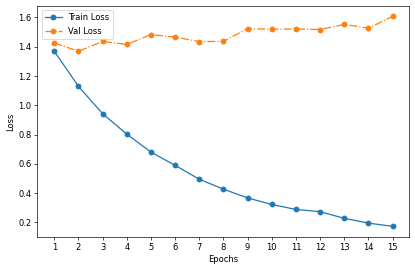

In [41]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 5]  # Tamaño global más pequeño
matplotlib.rcParams['figure.dpi'] = 60         # DPI reducido
print("==> Análisis del Entrenamiento de la Red Clásica NN ")
plot_comparative("Loss", nn_model_train_losses, nn_model_val_losses)

Ahora, muestra la evolución del `accuracy` en los conjuntos de **train** y en **validation**:

==> Evolución del Accuracy


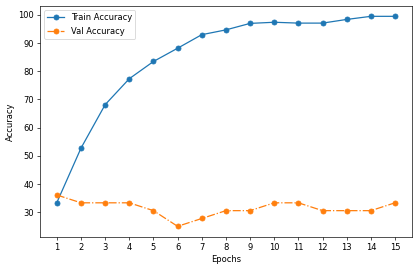

In [42]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 5]  # Tamaño global más pequeño
matplotlib.rcParams['figure.dpi'] = 60         # DPI reducido
print("==> Evolución del Accuracy")
plot_comparative("Accuracy", nn_model_train_accs, nn_model_val_accs)

**¿Identificas algún problema? ¿Qué solución propones?**

## Análisis de Problemas - Red Neuronal Clásica

El principal preblema es un `overfitting` muy severo. Se ve claramente en las gráficas que el modelo alcanza el 100% de accuracy en train 
desde la primera época, pero en validation se queda estancado en un 36%. Esta diferencia de 64 puntos porcentuales es enorme y significa 
que el modelo no está aprendiendo patrones generalizables, sino que memoriza los datos de entrenamiento. 

También se ve en la gráfica del `loss` que mientras el train loss va bajando constantemente (de 0.13 a 0.04), el validation loss va 
subiendo (de 1.59 a 1.70). Esta es la señal más clara de overfitting porque el modelo se optimiza solo para los datos que ya conoce.

La razón de este problema es que el modelo tiene demasiados parámetros (77 millones) para un dataset muy pequeño de slo 1000 imágenes.

### Soluciones:

Creo que una solución que se podría probar sería = añadir el Dropout en las capas de la red clásica para conseguir un efecto parecido a lo conseguido con las
capas FC (densas) en AlexNet.
Otra opción sería reducir el tamaño del modelo, hacer que tenga menos neuronas por capas. Pero supongo que esto tendría algún impacto en el resultado final.
Otra posible solución sería tener un mayor dataset en combinación con el uso de Dropout en las capas FC ocultas.
Por último solo un apunte. Recuerdo que el tutor mencionó una tecnica de "early stopping" que consistia en parar cuando el algorimo deja de mejorar pero:

sin duda alguna la mejor solución es usar una red neuronal diseñada para este propósito como son las `Redes Convolucionales / Convolutional Neural Network - CNN`.
Cómo se ha discutido en las tutorías de este módulo, las CNN han demostrado ser más resolutivas y eficaces con resultados espectaculares, superando con creces las redes clásicas..


### Ej 4.2. Análisis del entrenamiento del AlexNet (0,5 puntos)

Muestra la grafica utilizando la funcion `plot_comparative` la evolución del `loss` en los conjuntos de **train** y **validation** a lo largo de las épocas durante el entrenamiento de la CNN `AlexNet`

==> Evolución del 'loss'


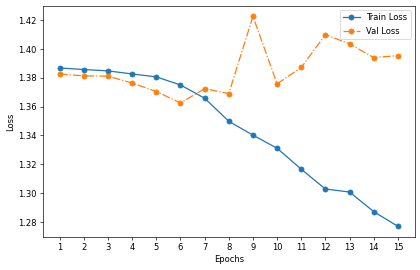

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 5]  # Tamaño global más pequeño
matplotlib.rcParams['figure.dpi'] = 60         # DPI reducido
print("==> Evolución del 'loss'")
plot_comparative("Loss", alexnet_model_train_losses, alexnet_model_val_losses)

Ahora, muestra la evolución del `accuracy` en los conjuntos de **train** y en **validation**::

==> Evolución del 'Accuracy'


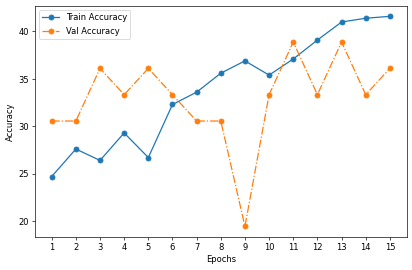

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 5]  # Tamaño global más pequeño
matplotlib.rcParams['figure.dpi'] = 60         # DPI reducido
print("==> Evolución del 'Accuracy'")
plot_comparative("Accuracy",alexnet_model_train_accs, alexnet_model_val_accs)

**¿Identificas algún problema? ¿Qué solución propones?**

## Análisis de Problemas - AlexNet

### ¿Identificas algún problema? ¿Qué solución propones?

**Problemas identificados:**

AlexNet presenta un mejor comportamiento que la red clásica, pero se pueden identificar algunos problemas.

El principal problema es que el rendimiento general sigue siendo bajo, con una accuracy final de 41.4% en train y 34.2% en test. 
Aunque esto es mucho mejor que el overfitting severo de la red clásica, indica que el modelo aún no está extrayendo características 
suficientemente discriminativas.

En las gráficas se ve que hay bastantes oscilaciones en validation, especialmente en accuracy, donde salta entre 27% y 42%. Esto 
sugiere que el conjunto de validation es muy pequeño y por tanto las métricas no son muy estables estadísticamente.

También se observa que el learning rate podría ser demasiado conservador. La mejora es muy gradual y lenta, lo que indica que 
con un learning rate ligeramente mayor podría converger más rápido a un mejor resultado.

**Soluciones propuestas:**

La primera solución sería aumentar el learning rate. En lugar de 1e-5, se podría probar con 1e-4 o 5e-5 para acelerar la convergencia 
y permitir que el modelo explore mejor el espacio de parámetros.

Otra mejora importante sería entrenar por más épocas. Las gráficas muestran que el modelo sigue mejorando gradualmente, por lo que 
25 o 30 épocas podrían dar mejores resultados.

También se podría implementar data augmentation, aplicando rotaciones, escalados y recortes aleatorios a las imágenes durante el entrenamiento. 
Esto aumentaría artificialmente el tamaño del dataset y ayudaría al modelo a generalizar mejor.

Por último, se podría ajustar la arquitectura reduciendo ligeramente el dropout (de 0.5 a 0.3) para permitir que más información fluya 
durante el entrenamiento, ya que el overfitting no parece ser un problema severo en este caso.



Gráfica extra para --> Comparación viusal con todas las gráficas juntas


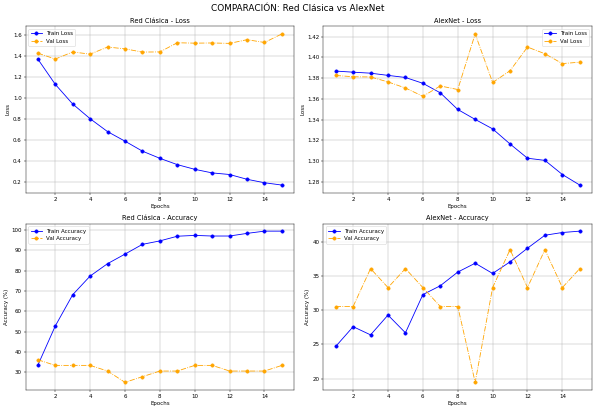

In [49]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 5]  # Tamaño global más pequeño
matplotlib.rcParams['figure.dpi'] = 40         # DPI reducido

print("Gráfica extra para --> Comparación viusal con todas las gráficas juntas")
# Crear figura con 4 subplots (2 filas, 2 columnas)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Gráfica 1: Loss Red Clásica
ax1.plot(range(1, 16), nn_model_train_losses, 'o-', label="Train Loss", color='blue')
ax1.plot(range(1, 16), nn_model_val_losses, 'o-.', label="Val Loss", color='orange')
ax1.set_title("Red Clásica - Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Gráfica 2: Loss AlexNet
ax2.plot(range(1, 16), alexnet_model_train_losses, 'o-', label="Train Loss", color='blue')
ax2.plot(range(1, 16), alexnet_model_val_losses, 'o-.', label="Val Loss", color='orange')
ax2.set_title("AlexNet - Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Gráfica 3: Accuracy Red Clásica
ax3.plot(range(1, 16), nn_model_train_accs, 'o-', label="Train Accuracy", color='blue')
ax3.plot(range(1, 16), nn_model_val_accs, 'o-.', label="Val Accuracy", color='orange')
ax3.set_title("Red Clásica - Accuracy")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy (%)")
ax3.legend()
ax3.grid(True)

# Gráfica 4: Accuracy AlexNet
ax4.plot(range(1, 16), alexnet_model_train_accs, 'o-', label="Train Accuracy", color='blue')
ax4.plot(range(1, 16), alexnet_model_val_accs, 'o-.', label="Val Accuracy", color='orange')
ax4.set_title("AlexNet - Accuracy")
ax4.set_xlabel("Epochs")
ax4.set_ylabel("Accuracy (%)")
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.suptitle("COMPARACIÓN: Red Clásica vs AlexNet", fontsize=16, y=1.02)
plt.show()

In [50]:
# Intento de prueba con otrao learning-rate

# Crear modelo AlexNet con nuevo learning rate
alexnet_model_fast = AlexNet()
alexnet_model_fast = alexnet_model_fast.to(device)
print(f"==> Modelo AlexNet creado y movido a: {device}")
print(f"Tipo de modelo: {type(alexnet_model_fast)}")

# Contar parámetros
parametros_alexnet_fast = contar_parametros(alexnet_model_fast)

# Configurar optimizador con nuevo learning rate
alexnet_optimizer_fast = torch.optim.Adam(alexnet_model_fast.parameters(), lr=3e-4)
print(f"-> Optimizador ADAM configurado para AlexNet")
print(f"Learning rate: {3e-4}")
print(f"Parámetros a optimizar: {parametros_alexnet_fast:,}")

# Configurar función de pérdida
alexnet_loss_fn_fast = nn.CrossEntropyLoss()
print(f"-> Función de pérdida configurada para AlexNet: CrossEntropyLoss")
print(f"Tipo: {type(alexnet_loss_fn_fast)}")

# Entrenar AlexNet con nuevo learning rate
alexnet_fast_train_losses, alexnet_fast_train_accs, alexnet_fast_val_losses, alexnet_fast_val_accs = [],[],[],[]
epochs = 15
print("-> Iniciando entrenamiento de AlexNET con LR = 3e-4")
print("=" * 50)
print(f"Configuración: {epochs} épocas, batch_size=64, lr=3e-4")
print("=" * 50)

for t in range(epochs):
    print(f"\nEpoch = {t+1} / {epochs}\n" + "-" * 50)
       
    # ENTRENAMIENTO: usar conjunto de train
    train_loss, train_acc = training(train_dataloader, alexnet_model_fast, alexnet_loss_fn_fast, alexnet_optimizer_fast)
   
    # Guardar métricas de entrenamiento
    alexnet_fast_train_losses.append(train_loss)
    alexnet_fast_train_accs.append(train_acc)
   
    # VALIDACIÓN: evaluar en conjunto de validación
    val_loss, val_acc = test_and_validation(validation_dataloader, alexnet_model_fast, alexnet_loss_fn_fast)
   
    # Guardar métricas de validación
    alexnet_fast_val_losses.append(val_loss)
    alexnet_fast_val_accs.append(val_acc)
   
    # Resumen de la época
    print(f"-> Resumen Época {t+1}:")
    print(f"  - Train - Loss: {train_loss:.4f}, Accuracy: {train_acc:.1f}%")
    print(f"  - Val   - Loss: {val_loss:.4f}, Accuracy: {val_acc:.1f}%")
    print("=" * 50)

# Evaluar en test
print("=" * 55)
print(" >>>  Métricas del Conjunto de Test --> ALEXNET LR=3e-4 <<<")
print("=" * 55 + "\n")

test_loss_fast, test_accuracy_fast = test_and_validation(test_dataloader, alexnet_model_fast, alexnet_loss_fn_fast)

print(f"-> MÉTRICAS FINALES - ALEXNET LR=3e-4:")
print(f"-> Test Loss: {test_loss_fast:.4f}")
print(f"-> Test Accuracy: {test_accuracy_fast:.1f}%")
print("\n" + "=" * 55 + "\n")

# Comparación
print(f"-> COMPARACIÓN DE LEARNING RATES:\n" + "-" * 55)
print(f"   AlexNet LR=1e-5     :  34.2%")
print(f"   AlexNet LR=3e-4     :  {test_accuracy_fast:.1f}%")
diferencia = test_accuracy_fast - 34.2
print(f"   Diferencia          :  {diferencia:+.1f} puntos")

==> Modelo AlexNet creado y movido a: cuda
Tipo de modelo: <class '__main__.AlexNet'>
Desglose de parámetros por capa:
----------------------------------------
conv1.weight:     34,848 parámetros
conv1.bias  :         96 parámetros
conv2.weight:    614,400 parámetros
conv2.bias  :        256 parámetros
conv3.weight:    884,736 parámetros
conv3.bias  :        384 parámetros
conv4.weight:  1,327,104 parámetros
conv4.bias  :        384 parámetros
conv5.weight:    884,736 parámetros
conv5.bias  :        256 parámetros
fc1.weight  : 37,748,736 parámetros
fc1.bias    :      4,096 parámetros
fc2.weight  : 16,777,216 parámetros
fc2.bias    :      4,096 parámetros
fc3.weight  :     16,384 parámetros
fc3.bias    :          4 parámetros
----------------------------------------
total       : 58,297,732 parámetros

>>> RESPUESTA = El modelo tiene --> 58,297,732 <-- Parámetros entrenables
-> Optimizador ADAM configurado para AlexNet
Learning rate: 0.0003
Parámetros a optimizar: 58,297,732
-> Función

==> ANÁLISIS DEL ENTRENAMIENTO - ALEXNET con Learning Rate LR=3e-4
-> Evolución del Loss:


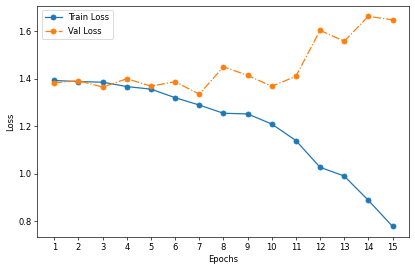

-> Evolución del Accuracy:


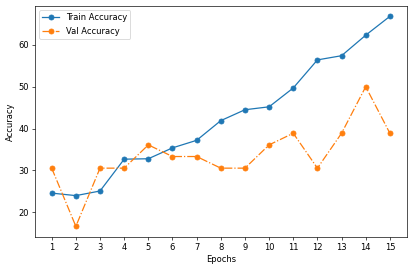

In [51]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 5]  # Tamaño global más pequeño
matplotlib.rcParams['figure.dpi'] = 60         # DPI reducido

# Gráficas del experimento con LR=3e-4
print("==> ANÁLISIS DEL ENTRENAMIENTO - ALEXNET con Learning Rate LR=3e-4")
print("=" * 60)
print("-> Evolución del Loss:")

# Gráfica de Loss para AlexNet LR=3e-4
plot_comparative("Loss", alexnet_fast_train_losses, alexnet_fast_val_losses)

print("-> Evolución del Accuracy:")

# Gráfica de Accuracy para AlexNet LR=3e-4
plot_comparative("Accuracy", alexnet_fast_train_accs, alexnet_fast_val_accs)

### análisis de las gráficas

Al obserbar estas gráficas se pueden obserbar diferencias muyu clasras respecto al entrenamiento anterior.

Con estos resultados se aprecia un descenso muy pronunciado del Train-Loss el cual tiene una mejora consistente y llega a valores también más bajos de 1.4. Estos nos indica que el modelo está aprendiendo con más eficiencia.
El Validation Loss empieza bien pero después sube drásticamente a partir de las épocas 8-9 y llega a valores demasiado altos por encima del 2.0. Esto indica que
el modelo se está sobreajustando (overfitting).

En la gráfica del Accuracy también hay una divergencia notable. El Train Accuracy sube de manera vertiginosa a valores muy altos pasando de un 26% (con 1e-5) al 77% (con 3e-4). Sin embargo, Validation Accuracy se queda entre el 20% y el 35%, lo cual no muestra una mejora.

Esto se traduce como una señal de overfitting y nos da a entender que el leraning rate usado no es óptimo, y es por tanto, demasiado agresivo.



## Comentario final

Como último apunte, me gustaría mencionar que es la primera vez que hago algo de ML o de DL y esta práctica me ha tomado muchos días resolverla. Así que estoy bastante abrumado con tanta información y código. Con este módulo tomo una base mínima en mi caso, pero una buena base desde la que seguir investigando con otro tipo de algoritmos en el futuro. He empezado este máster con un desconocimiento total de ML y DL, y me parece impresionante todo lo que hemos visto hasta ahora y concretamente en este módulo.

---
## Fin de la `práctica 1`